In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
import cv2
from skimage import feature, filters
from PIL import Image
from scipy import ndimage

# read image and write in csv

In [8]:
data_root = "C:\\Temp\\data\\mask_image_1\\"
folder_mask = glob.glob(os.path.join(data_root,"*.png"))

In [11]:
input_size = (1080,1920)

In [29]:
for i in [0,24,46,246,277]: # range(len(folder_mask))):
    mask  = np.array(Image.open(os.path.join(data_root,str(i)+".png")).convert('P')) # folder_mask[i]
    hole  = mask - ndimage.binary_fill_holes(mask)
    edges = feature.canny(hole).astype('float32')
    edges = cv2.resize(edges, (input_size[1],input_size[0]), interpolation = cv2.INTER_NEAREST)
    plt.imsave(os.path.join(data_root, "..","coordinates_contour_1",str(i)+".png"), edges,cmap="binary_r")
    x,y = np.where(edges==1.)
    df  = pd.DataFrame({'x': x, 'y': y})
    df.to_csv(path_or_buf=os.path.join(data_root, "..","coordinates_contour_1",  str(i)+".csv"),index=False)

# read csv and plot

In [ ]:
folder_mask = glob.glob(os.path.join(data_root,"coordinates\\*.csv"))

In [ ]:
for i in range(len(folder_mask)):
    df = pd.read_csv(folder_mask[i]) 
    plt.plot(df['y'], df['x'],'o')
    plt.show()

# Fit

In [7]:
from numpy import array, linalg, matrix
from scipy.special import comb as nOk

In [8]:
data_root = "C:\\Users\\gueganj\\Desktop\\My_DataBase\\nature\\"
folder_mask = glob.glob(os.path.join(data_root,"masks","contour","*.png"))

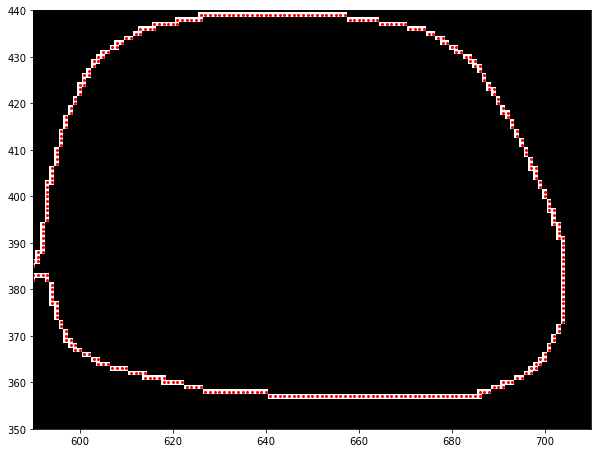

In [62]:
img = plt.imread(folder_mask[0])
img = img[:,:,0]
x,y = np.where(img==1.)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='binary_r')
plt.plot(y, x,'ro',markersize=2)
plt.axis([590,710,350,440])
plt.show()

In [153]:
import cv2
full_image = cv2.imread(folder_mask[0])

In [168]:
test = cv2.cvtColor(full_image, cv2.COLOR_RGB2GRAY)
contours, hierarchy = cv2.findContours(test, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [199]:
os.getcwd()

'C:\\Users\\gueganj\\Desktop\\Utils'

In [201]:
contours_0 = contours[0].squeeze()

df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('test.csv',index=False)

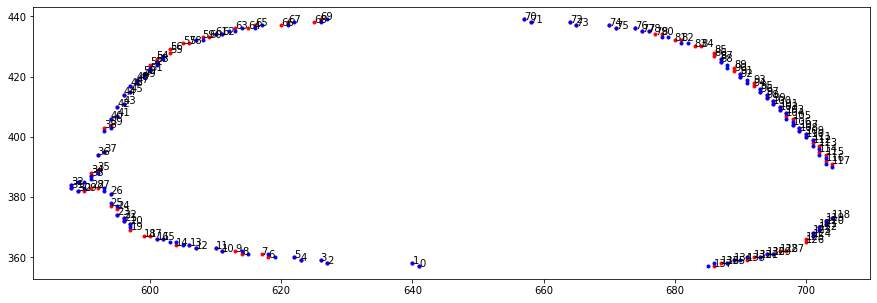

In [191]:
plt.figure(figsize=(15,5))
for i,pts in enumerate(contours[0]):
    plt.plot(pts[0][0],pts[0][1],'r.')
    plt.text(pts[0][0], pts[0][1], str(i))
plt.show()

## Fourier descriptors

In [112]:
n = len(glass_1)
contour = np.array([x,y]).T

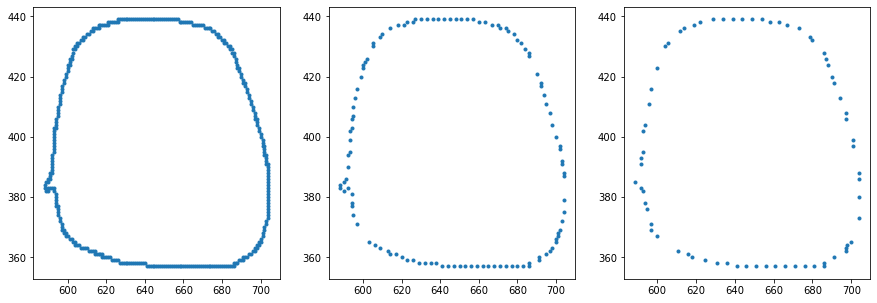

In [125]:
glass_1 = contour[contour[:,1]<710,:]
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(glass_1[:,1],glass_1[:,0],'.')
plt.subplot(132)
plt.plot(glass_1[0:n:3,1],glass_1[0:n:3,0],'.')
plt.subplot(133)
plt.plot(glass_1[0:n:5,1],glass_1[0:n:5,0],'.')
plt.show()

**order of point is important !**

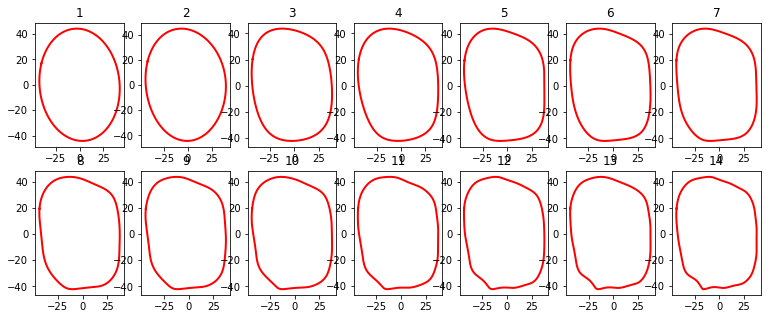

In [197]:
import pyefd
coeffs = pyefd.elliptic_fourier_descriptors(contours[0].squeeze(), order=14)
plt.figure(figsize=(13,5))
pyefd.plot_efd(coeffs)

**test**

In [136]:
ind = np.arange(0,len(contour_1))
np.random.shuffle(ind)

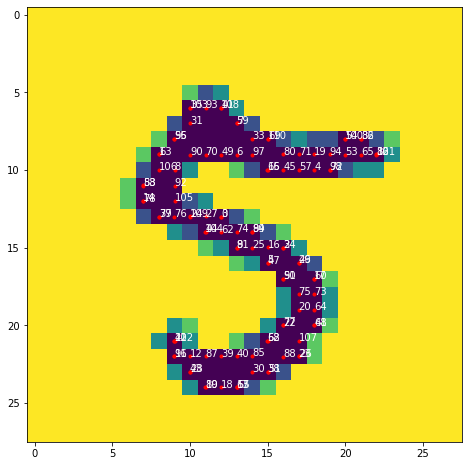

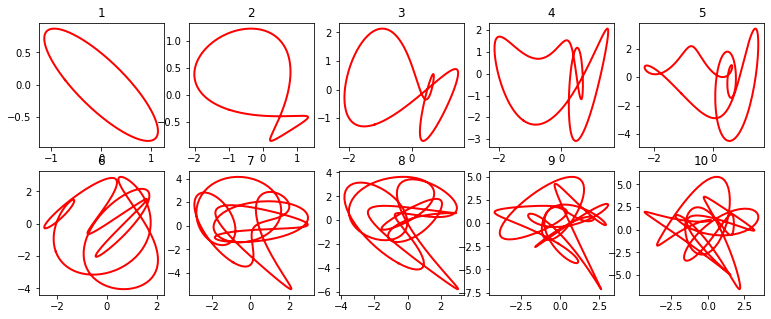

In [148]:
plt.figure(figsize=(15,8))
plt.imshow(img_1)
contour_rand = contour_1[ind,:]
plt.plot(contour_1[:,1],contour_1[:,0],'r.')
for i in range(contour_1.shape[0]):
    plt.text(contour_rand[i,1], contour_rand[i,0], str(i),c='w')
plt.show()
coeffs = pyefd.elliptic_fourier_descriptors(contour_rand, order=10)
plt.figure(figsize=(13,5))
pyefd.plot_efd(coeffs)

## Bezier

## test

In [239]:
from scipy.special import comb as n_over_k
Mtk = lambda n, t, k: t**k * (1-t)**(n-k) * n_over_k(n,k)
order = 6
BézierCoeff = lambda ts: [[Mtk(order,t,k) for k in range(order+1)] for t in ts]

x_input = np.linspace(1. ,10., 10)
y_input = np.log(x_input)
data    = np.column_stack((x_input, y_input)) # shapes (9,2)
tData   = np.linspace(0. ,10., len(x_input))
Pseudoinverse  = np.linalg.pinv(BézierCoeff(tData)) # (9,4) -> (4,9)
control_points = Pseudoinverse.dot(data)     # (4,9)*(9,2) -> (4,2)

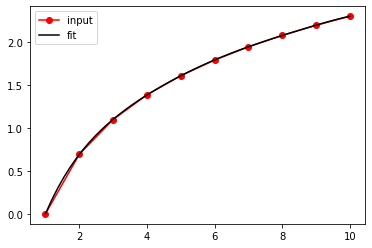

In [240]:
tPlot = np.linspace(0. ,10.)
Bézier = np.array(BézierCoeff(tPlot)).dot(control_points)
plt.plot(x_input, y_input, 'ro-', label='input')
plt.plot(Bézier[:,0], Bézier[:,1], 'k-', label='fit')
plt.legend()
plt.show()

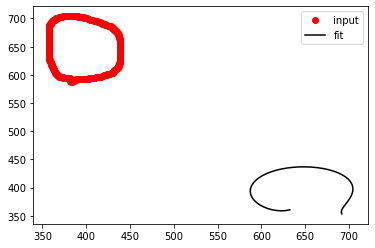

In [242]:
tData   = np.linspace(0. ,10., len(glass_1))
Pseudoinverse = np.linalg.pinv(BézierCoeff(tData)) # (9,4) -> (4,9)
control_points = Pseudoinverse.dot(glass_1)     # (4,9)*(9,2) -> (4,2)
tPlot  = np.linspace(0. ,10.)
Bézier = np.array(BézierCoeff(tPlot)).dot(control_points)
plt.plot(glass_1[:,0], glass_1[:,1], 'ro', label='input')
plt.plot(Bézier[:,0], Bézier[:,1], 'k-', label='fit')
plt.legend()
plt.show()